### Batch size 
It is a term used in machine learning and refers to the number of training examples utilised in one iteration. The batch size can be one of three options:

__batch mode__: where the batch size is equal to the total dataset thus making the iteration and epoch values equivalent
<br>
__mini-batch mode__: where the batch size is greater than one but less than the total dataset size. Usually, a number that can be divided into the total dataset size.
<br>
__stochastic mode__: where the batch size is equal to one. Therefore the gradient and the neural network parameters are updated after each sample.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import make_regression

x,y = make_regression(n_features=1, n_samples=5000, bias=4, noise=15)

x = np.reshape(x,(-1,))
y = np.reshape(y,(-1,))

print(x.shape, y.shape)

(5000,) (5000,)


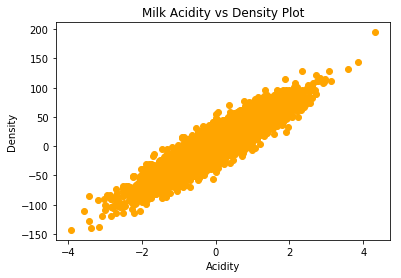

In [7]:
# Normalization
x = (x-x.mean())/x.std()
plt.scatter(x,y,color='orange')
plt.xlabel("Acidity")
plt.ylabel("Density")
plt.title("Milk Acidity vs Density Plot")
plt.show()

In [37]:
# Linear Regression
def hypotheses(x,theta):
    return theta[0] + x*theta[1]

def error(x,y,theta):
    err = 0
    for i in range(y.shape[0]):
        err += (hypotheses(x[i],theta) - y[i])**2
    return err/2

def gradient(x,y,theta):
    grad = np.zeros((2,))
    for i in range(y.shape[0]):
        h = hypotheses(x[i],theta)
        grad[0] += (h - y[i])
        grad[1] += (h - y[i])*x[i]
    return grad*.5

def batch_gradient(x,y,theta,batch_size=1):
    m = y.shape[0]
    # All indices from 1 to m
    indices = np.arange(m)
    # Shuffle indices
    np.random.shuffle(indices)
    # Get the first batch_size
    indices = indices[:batch_size]
    grad = np.zeros((2,))
    for i in indices:
        h = hypotheses(x[i],theta)
        grad[0] += (h - y[i])
        grad[1] += (h - y[i])*x[i]
    return grad*0.5

def gradientDescent(x,y,learning_rate=0.01,max_itr=400):
    theta = np.zeros((2,))
    
    e = error(x,y,theta)
    de = e
    error_list = [e]
    while(max_itr):
        grad = batch_gradient(x,y,theta)
        theta = theta - learning_rate*grad
        ne = error(x,y,theta)
        if(max_itr%10==0):
            error_list.append(ne)
        de = ne-e
        e = ne
        max_itr-=1
    return theta,error_list

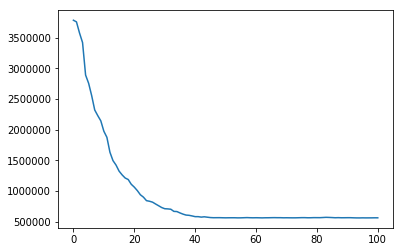

In [47]:
theta,e = gradientDescent(x,y,max_itr=1000)
plt.plot(e)
plt.show()

In [48]:
def drawLine(theta):
    x_pts = np.linspace(-4,4,10)
    y_pts = hypotheses(x_pts,theta)

    plt.scatter(x,y)
    plt.plot(x_pts,y_pts,color='black')

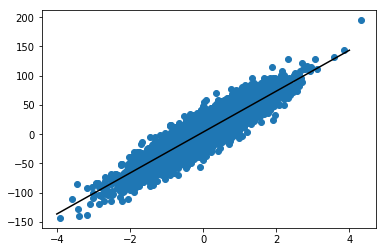

In [49]:
drawLine(theta)